In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [55]:
history = pd.read_hdf("message_count_4_15.hdf", key="message_dates")

In [56]:
def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

In [57]:
history.Players

0           Kame (S2-10th)
1          Eagle (S2-13th)
2         Ripple (S2-12th)
3        Murdock (S2-11th)
4         Amanda (S2-16th)
5         Xant (S2-Winner)
6             Leo (S2-9th)
7      Wonderland (S2-5th)
8         Darius (S2-17th)
9          Calvin (S2-7th)
10        Kirsten (S2-2nd)
11       Bourkie (S2-14th)
12          Echo (S2-15th)
13           Kror (S2-6th)
14        Lorelis (S2-8th)
15    Not Damien (S2-18th)
16    Whimsicott (removed)
17      Marjorie (removed)
Name: Players, dtype: object

In [58]:
np.max(np.max(history.Times.values))//3600

519

In [59]:
np.divmod(history.Times.values[0], 3600)[0]

array([497, 497, 498, ..., 208, 208, 230])

In [60]:
import datetime
from_date = datetime.datetime(2021,4,15,00,00,00)
to_date = datetime.datetime.now()
diff_secs = (to_date - from_date).seconds + (to_date - from_date).days*24*3600


hour_bins = np.linspace(0, diff_secs//3600+1, diff_secs//3600+2)
print(hour_bins)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

In [61]:
rounds = {
    'Round1':datetime.datetime(2021,4,15,00,25,00),
    'Round2':datetime.datetime(2021,4,16,18,7,00),
    'Round3':datetime.datetime(2021,4,17,18,4,00),
    'Round4':datetime.datetime(2021,4,18,18,4,00),
    'Round5':datetime.datetime(2021,4,20,18,6,00),
    'Round6':datetime.datetime(2021,4,21,18,15,00),
    'Round7':datetime.datetime(2021,4,22,18,16,00),
    'Round8':datetime.datetime(2021,4,24,19,21,00),
    'Round9':datetime.datetime(2021,4,25,7,45,00),
    'Round10':datetime.datetime(2021,4,25,20,14,00),
    'Round11':datetime.datetime(2021,4,28,17,16,00),
    'Round12':datetime.datetime(2021,4,29,17,2,00),
    'Round13':datetime.datetime(2021,4,30,17,5,00),
    'Round14':datetime.datetime(2021,5,2,17,24,00),
    'Final':datetime.datetime(2021,5,2,22,29,00),
    'End':datetime.datetime(2021,5,6,22,00,00)
}

In [62]:
round_times = list(rounds.values())
a = [j-datetime.datetime(2021,4,15,00,25,00) for i,j in zip(round_times[:-1],round_times[1:])]
b = [j.days*24*3600+j.seconds for j in a]
b.insert(0,0)
print(b)

[0, 150120, 236340, 322740, 495660, 582600, 669060, 845760, 890400, 935340, 1183860, 1269420, 1356000, 1529940, 1548240, 1892100]


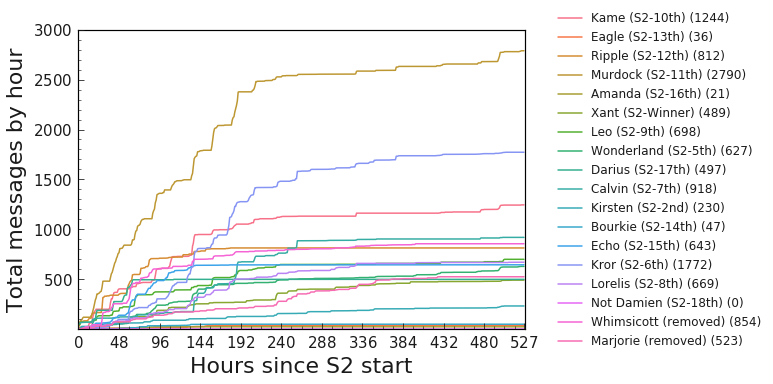

In [67]:
plt.style.use('belle2')
fig, ax = plt.subplots(1,1)

#cm = plt.get_cmap('gist_rainbow')
cm = sns.color_palette('husl', as_cmap=True)

dictas = {}

for i, player in enumerate(history.Players):
    
    hours = np.divmod(history.query(f'Players=="{player}"').Times.values[0], 3600)[0]
    message_lengths = history.query(f'Players=="{player}"').Lengths.values[0]
    #binned_messages, bin_edges = np.histogram(hours, bins=hour_bins, weights=message_lengths)
    binned_messages,bin_edges = np.histogram(hours, bins=hour_bins)
    cum_binned_messages = np.cumsum(binned_messages)
    
    n_msgs = np.array(history.query(f'Players=="{player}"').Times.values[0])
    message_lengths = history.query(f'Players=="{player}"').Lengths.values[0]

    n_msgs, _ = np.histogram(n_msgs, bins = b, weights=message_lengths)


    binned_totals = {}
    for n, a_round in enumerate(list(rounds.keys())[:-1]):       
       
        binned_totals[f"{a_round}"] = n_msgs[n]        
        dictas[player] = binned_totals
        
    mid_hours = bin_edges[1:]
    ax.plot(mid_hours, cum_binned_messages,label=f'{player} ({cum_binned_messages[-1]})', color=cm(i/18))

ax.set_xlim(1,max(hour_bins)+1)
ax.set_ylim(1,)
ax.set_xlabel('Hours since S2 start')

ax.set_xticks([hour_bin for hour_bin in hour_bins if (hour_bin%48==0)]+[max(hour_bins)])
ax.set_ylabel('Total messages by hour')

ax.legend(loc='lower left', bbox_to_anchor=(1.05,-0.1), fontsize=12)

fig.savefig("message_plot.png", bbox_inches='tight')


In [71]:
df =pd.DataFrame.from_dict(dictas,orient='index')
#df.columns.name = 'Hours since start:'
#df.style.set_properties(subset=["Hours since start:"], **{'text-align': 'left'})
df['Total'] = df.sum(axis=1)

df.sort_values('Total', ascending=False).style.format('{:.0f}')


,Round1,Round2,Round3,Round4,Round5,Round6,Round7,Round8,Round9,Round10,Round11,Round12,Round13,Round14,Final,Total
Murdock (S2-11th),33679,17611,15189,30986,19969,12344,17987,761,3612,2193,674,2226,891,246,10415,168783
Wonderland (S2-5th),14737,12853,10550,21669,9141,5073,4774,1821,1443,7159,1440,2242,17745,1166,8006,119819
Kame (S2-10th),26152,3792,4259,26618,3358,3326,4120,247,36,1939,527,0,0,642,8169,83185
Kror (S2-6th),2079,6742,2902,20271,6436,16500,9326,1377,3662,3647,2593,2390,294,295,2020,80534
Echo (S2-15th),5249,12701,13030,13091,449,196,0,0,0,0,0,0,0,0,1300,46016
Whimsicott (removed),11623,7919,6174,4555,1488,3276,899,269,89,1659,290,343,4027,0,0,42611
Lorelis (S2-8th),4528,4504,3812,6044,3294,3680,4316,928,1420,5351,0,0,1333,18,629,39857
Xant (S2-Winner),1515,3570,1462,3902,2066,94,4083,369,1254,804,811,232,870,62,10312,31406
Calvin (S2-7th),4356,923,659,4525,4706,3736,6432,1540,3523,170,122,158,0,0,547,31397
Leo (S2-9th),6679,2419,6733,2329,3256,932,3205,357,5,57,260,0,0,372,1905,28509
